In [96]:
library(rdmc)
library(tidyverse)
library(vroom)
library(ggforce)
library(cowplot)
library(patchwork)
library(brms)
library(MaizePal)
theme_set(cowplot::theme_cowplot(font_size = 12))
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 200)

# Diversity

In [97]:
source("../color_df.R")

all_files = list.files(path = "../data/angsd_pi", full.names = TRUE)
pi_files = all_files[grep(pattern = "100000BP", all_files)]


pi_df <- 
pi_files %>% 
    map_df(~{
       vroom(.x, delim = "\t", col_names = TRUE) %>% 
        filter(nSites > 100000 * 0.2) %>% 
        #filter(nSites > 1000 * 0.2) %>% 
        mutate(
            pi = tW/nSites,
            pop = str_replace(string = .x, pattern = "../data/angsd_pi/", replacement = ""),
            pop = str_replace(string = pop, pattern = ".100000BP_theta.thetasWindow.gz.pestPG", replacement = ""),
            pop = str_replace(string = pop, pattern = ".1000BP_theta.thetasWindow.gz.pestPG", replacement = ""),
            )
    }) %>% 
    separate(col = pop, into = c("ref", "subspecies", "pop"), sep = "--") %>% 
    mutate(pop = str_replace(pop, "LR_|Teo_", "")) %>%  
    full_join(., mutate(color_df, pop = str_replace(pop, "LR_|Teo_", "")), by = "pop")


Rows: 21,326
Columns: 14
Delimiter: "\t"
chr [ 2]: #(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop), Chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 21,327
Columns: 14
Delimiter: "\t"
chr [ 2]: #(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop), Chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 21,326
Columns: 14
Delimiter: "\t"
chr [ 2]: #(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop), Chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` arg

`summarise()` regrouping output by 'subspecies' (override with `.groups` argument)



subspecies,pop,mean(pi)
<chr>,<chr>,<dbl>
LR,Amatlan_de_Canas,0.005633300
LR,Crucero_Lagunitas,0.004974730
LR,Los_Guajes,0.005033849
LR,Palmar_Chico,0.006186484
LR,random,0.005940624
LR,random1_Palmar_Chico,0.005340370


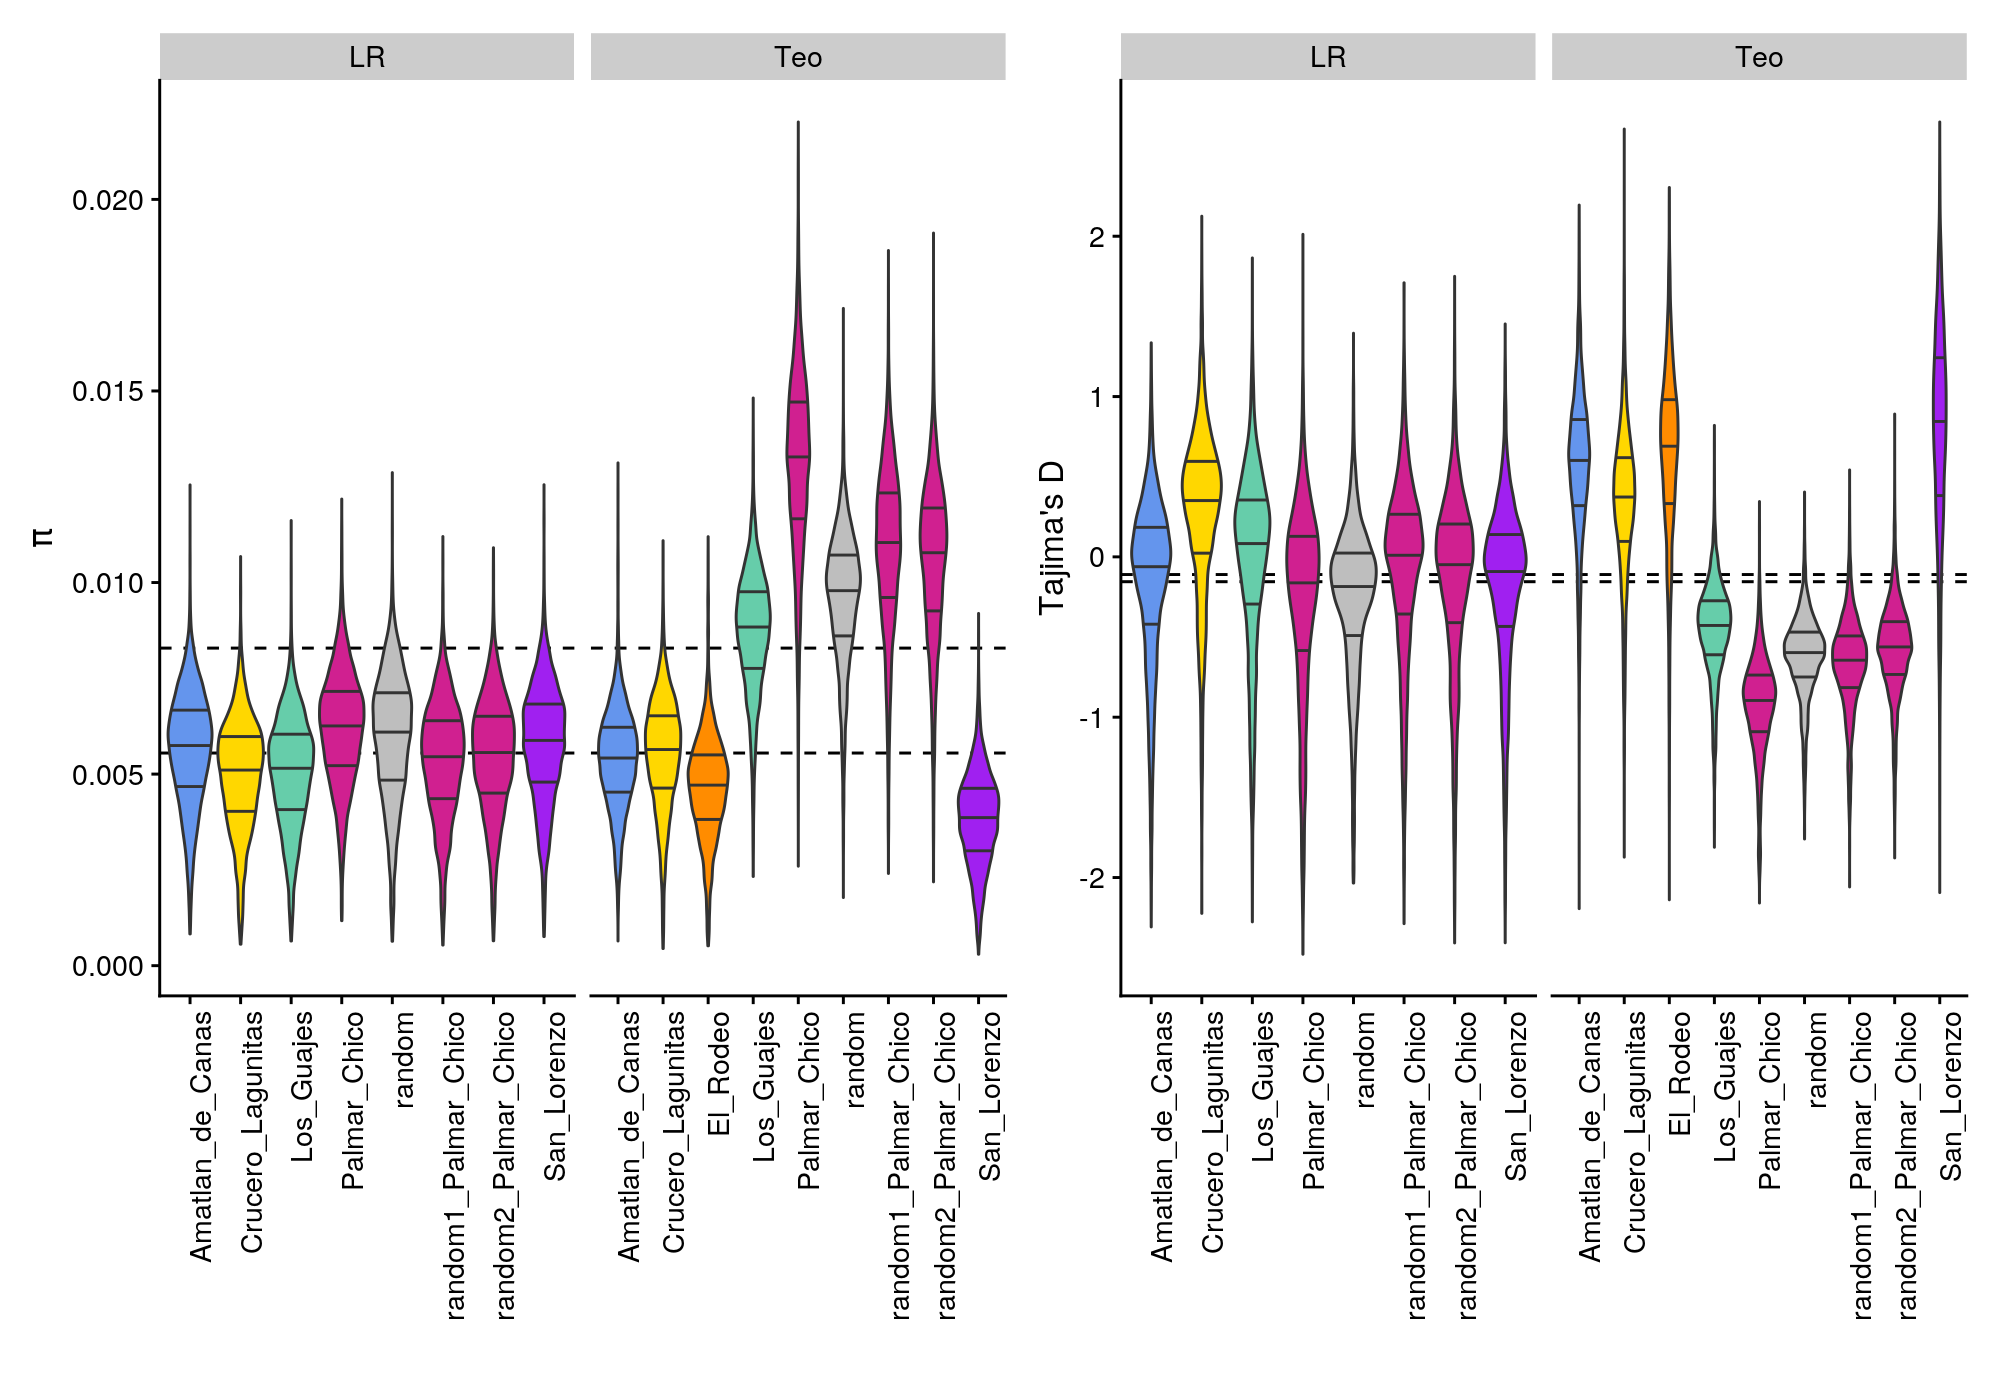

In [24]:
piplot <- 
pi_df %>% 
ggplot(aes(x = pop, y = pi, fill = color)) +
    geom_hline(yintercept = mean(filter(pi_df, subspecies == "LR")$pi), lty = 2) +
    geom_hline(yintercept = mean(filter(pi_df, subspecies == "Teo")$pi), lty = 2) +
    #geom_boxplot(outlier.shape = NA) +
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
    facet_wrap(~subspecies, scales = "free_x") +
    scale_fill_identity() +
    theme(axis.text.x=element_text(angle = 90, hjust = 1)) +
    ylab(expression(pi)) +
    xlab("")

tdplot <- 
pi_df %>% 
ggplot(aes(x = pop, y = Tajima, fill = color)) +
    geom_hline(yintercept = mean(filter(pi_df, subspecies == "LR")$Tajima), lty = 2) +
    geom_hline(yintercept = mean(filter(pi_df, subspecies == "Teo")$Tajima), lty = 2) +
    #geom_boxplot(outlier.shape = NA) +
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
    facet_wrap(~subspecies, scales = "free_x") +
    scale_fill_identity() +
    theme(axis.text.x=element_text(angle = 90, hjust = 1)) +
    ylab("Tajima's D") +
    xlab("")



piplot + tdplot

pi_df %>% 
    group_by(subspecies, pop) %>% 
    summarise(mean(pi)) %>% 
    head()

# Inbreeding

In [2]:
all_relate = list.files(path = "../data/ngsRelate/", full.names = TRUE)
related_files = all_relate[grep(pattern = ".ngsRelate.txt$", all_relate)]

 
relate_df <- 
related_files %>%
    map_df(~{
        ssp <- str_replace(.x, pattern = "(.+)(LR|Teo)--(.+).ngsRelate.txt", "\\2")
        pop <- str_replace(.x, pattern = "(.+)(LR|Teo)--(.+).ngsRelate.txt", "\\3")    
        vroom(.x, delim = "\t", col_names = TRUE) %>% 
        mutate(subspecies = ssp, pop = pop, ssp_pop = paste0(ssp, "--", pop))
    })

Rows: 45
Columns: 33
Delimiter: "\t"
chr [ 1]: 2dsfs
dbl [32]: a, b, nSites, J9, J8, J7, J6, J5, J4, J3, J2, J1, rab, Fa, Fb, theta, inbred_rel...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 45
Columns: 33
Delimiter: "\t"
chr [ 1]: 2dsfs
dbl [32]: a, b, nSites, J9, J8, J7, J6, J5, J4, J3, J2, J1, rab, Fa, Fb, theta, inbred_rel...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 45
Columns: 33
Delimiter: "\t"
chr [ 1]: 2dsfs
dbl [32]: a, b, nSites, J9, J8, J7, J6, J5, J4, J3, J2, J1, rab, Fa, Fb, theta, inbred_rel...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 1,485
Columns: 33
Delimiter: "\t"
chr [ 1]: 2dsfs
dbl [32]: a, b, nSites, J9, J8, J7, J6, J5, J4, J3, J2, J1, rab, Fa, Fb, theta, inbred_rel...

Use `spec()` to

a,b,Fa,Fb
<dbl>,<dbl>,<dbl>,<dbl>
0,7,0.373607,0.000000
0,6,0.373426,0.000000
0,31,0.366273,0.123112
0,19,0.365181,0.074104
0,35,0.364806,0.122373
0,37,0.364492,0.147454
0,22,0.364464,0.082362
0,2,0.363902,0.111937
0,36,0.363751,0.144810


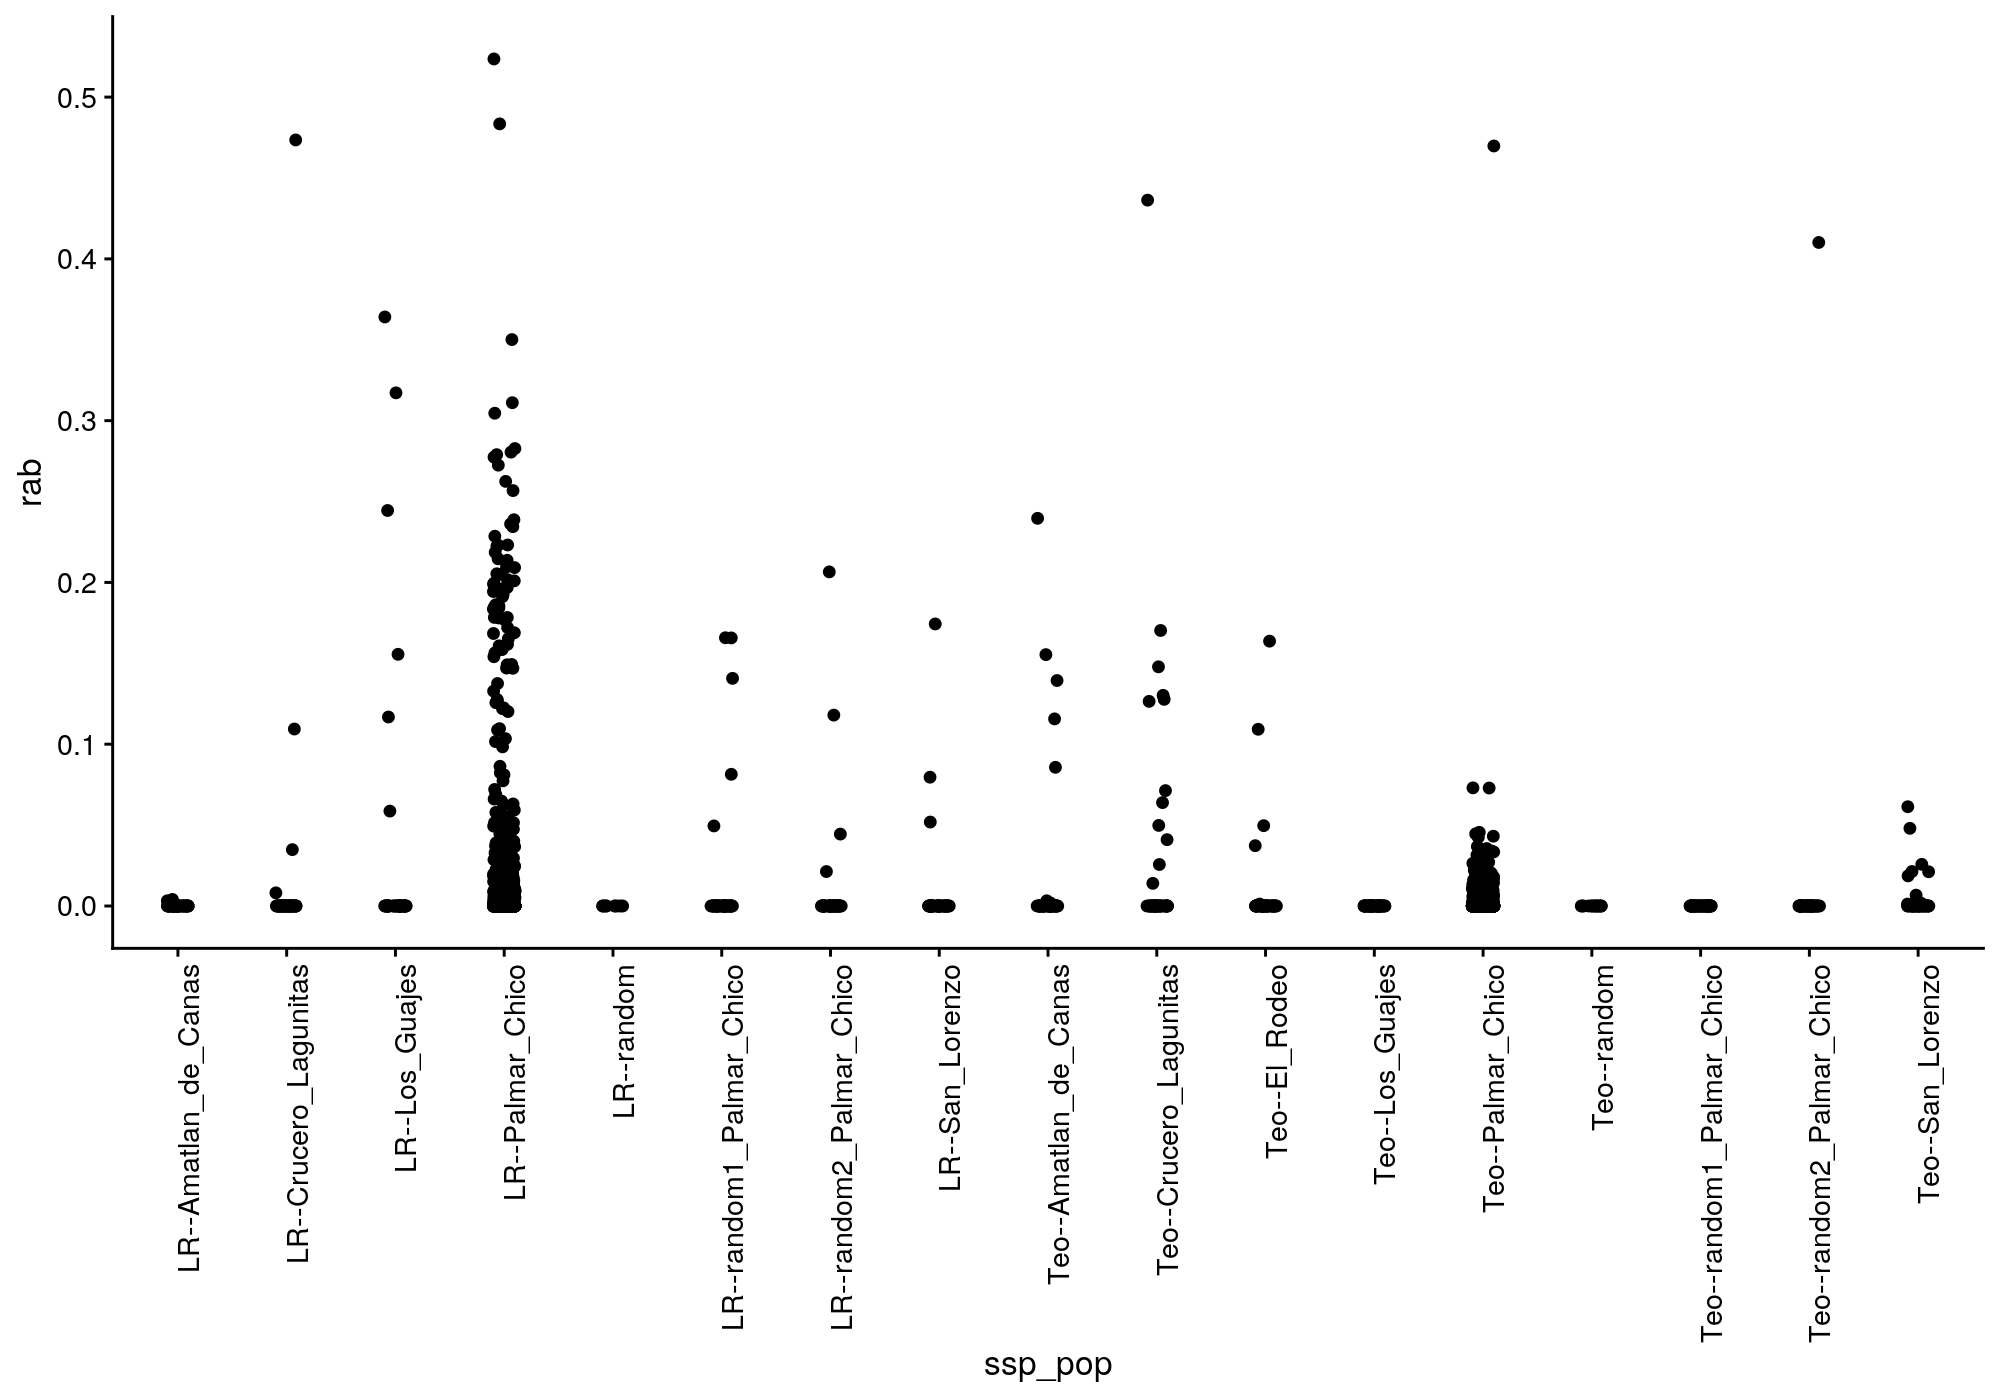

In [26]:
relate_df %>%  
    #pivot_longer(cols = c("Fa", "Fb"), names_to = "type", values_to = "F") %>% 
    #filter(grepl("random", ssp_pop)) %>% 
    ggplot(aes(ssp_pop, rab)) +
    #geom_sina() +
    geom_jitter(width = 0.1, height = 0) +
    theme(axis.text.x=element_text(angle = 90, hjust = 1))

relate_df %>% 
    filter(ssp_pop == "Teo--Palmar_Chico") %>% 
    select(a, b, Fa, Fb) %>% 
    arrange(desc(Fa), desc(Fb))
    

In [79]:
library("scatterpie")

chico_q <- read_delim("../data/ngsAdmix/v5_Teo_2_thin1M_PalmarChicoONLY.qopt", " ", col_names = F) %>% 
    select(-X3) %>% 
    mutate(a = 0:(n()-1))

jr_df <- relate_df %>%
    filter(ssp_pop == "Teo--Palmar_Chico") %>% 
    select(a, rab) %>% 
    full_join(., chico_q, by = c("a" = "a"))

#jr_df

max(filter(relate_df, ssp_pop == "Teo--Palmar_Chico")$a)


Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_logical()
)



[1] 48

# Homozgosity By Descent (HBD)

Parsed with column specification:
cols(
  chr = col_double(),
  pos = col_double(),
  cm = col_double()
)



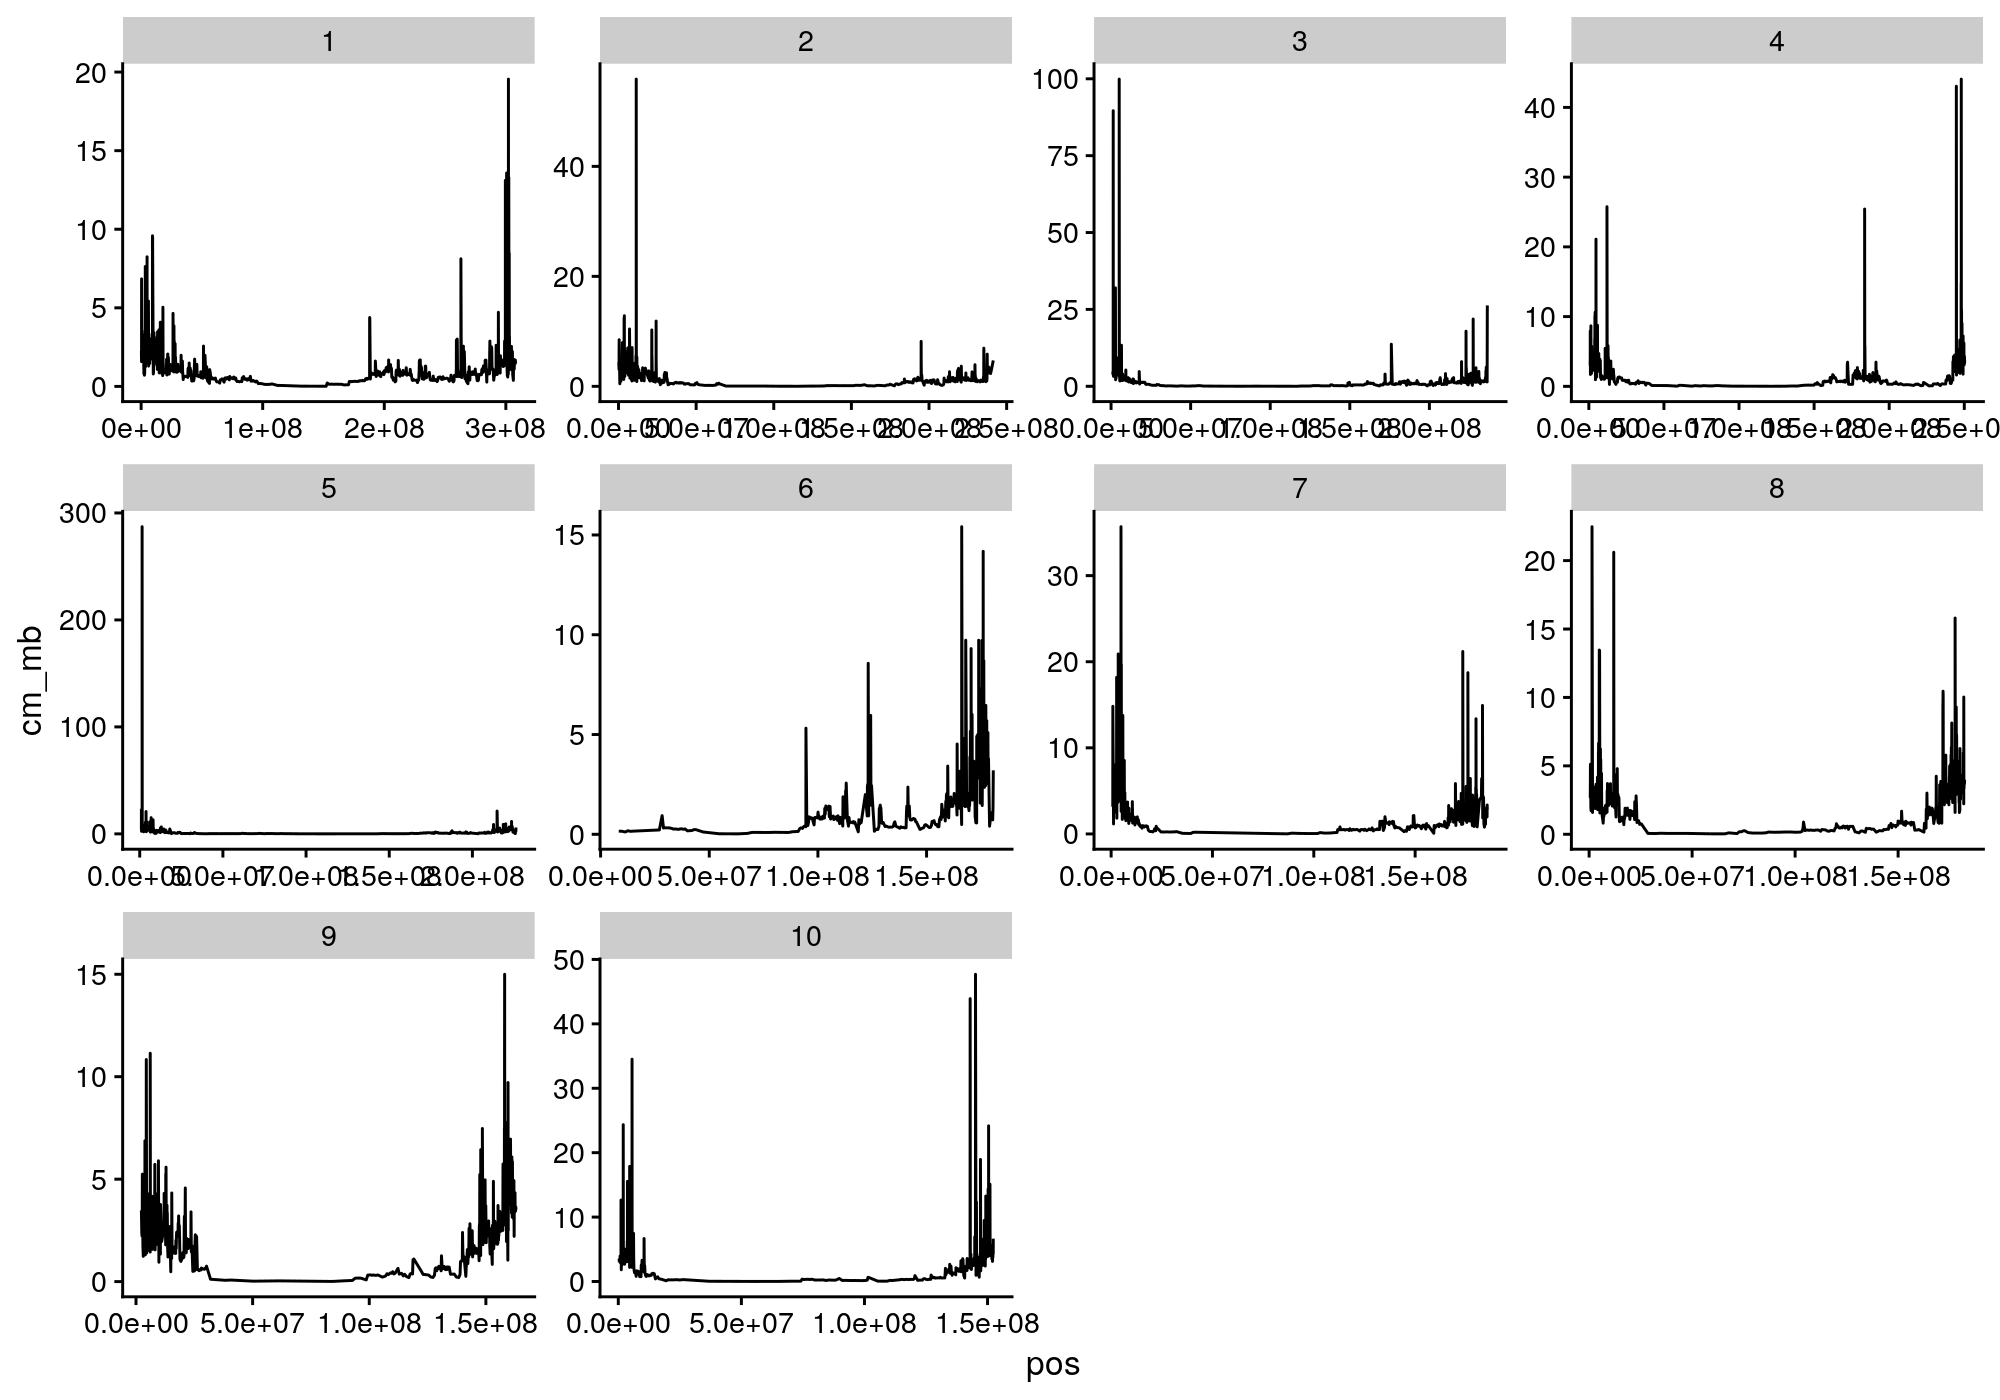

chr,pos,cm,cm_mb
<dbl>,<dbl>,<dbl>,<dbl>
1,214369,-4.6,2.246181
1,341276,-4.4,1.575957
1,370511,-4.2,6.841115
1,532547,-3.8,2.468587
1,603370,-3.6,2.823941
1,694670,-3.4,2.190581


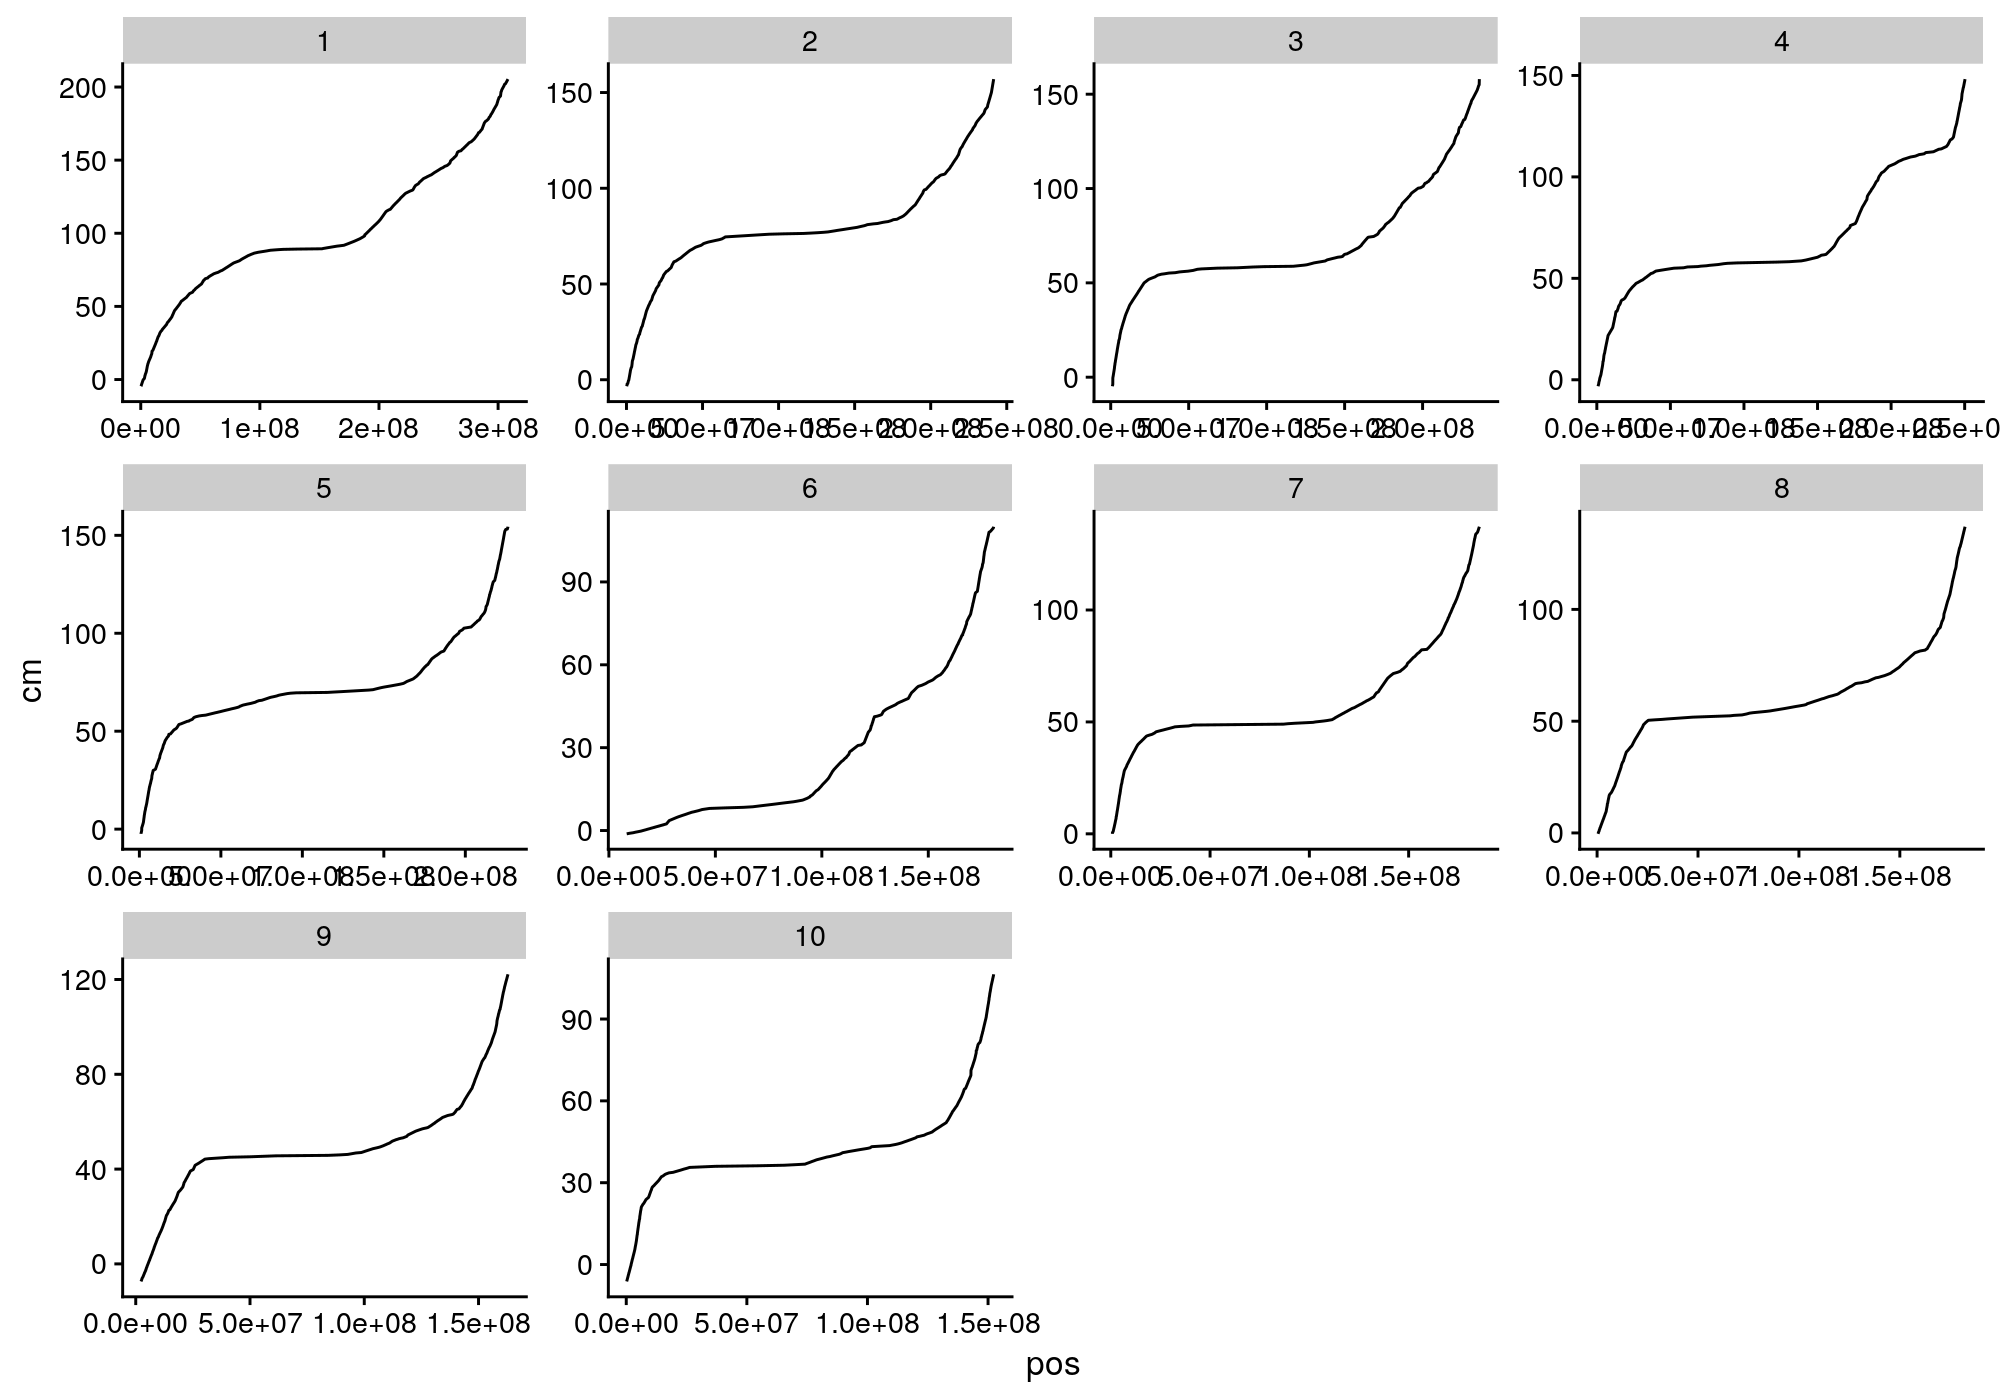

In [34]:
#interpolating phystical - genetic map positions

#switch to approxfun to interpolate

gmap <- read_delim("../data/map/ogut_v5.map.txt", delim = "\t") %>% 
    drop_na() %>%
    group_by(chr) %>% 
    group_modify(~{
        df1 <- slice(.x, -nrow(.x))
        df2 <- slice(.x, -1)
        to_keep <- df2$cm > df1$cm & df2$pos > df1$pos
        df1 <- df1[to_keep, ]
        df2 <- df2[to_keep, ]
        cm_mb <- tibble(cm_mb = 1e6*(df2$cm - df1$cm)/(df2$pos - df1$pos))
        bind_cols(df2, cm_mb)
    })


map_splines <- 
gmap %>% 
    group_by(chr) %>% 
    group_map(~{ 
        pos = .x$pos
        cm = .x$cm
        smooth.spline(pos, cm)
    })

gmap %>% 
ggplot(aes(pos, cm_mb)) +
geom_line()+
facet_wrap(~chr, scales = "free")

gmap %>% 
ggplot(aes(pos, cm)) +
geom_line()+
facet_wrap(~chr, scales = "free")

head(gmap)

In [46]:
#r2_files <- list.files("../data/ibdseq", full.names = TRUE)[grep("r2max0.4.r2.filtered", list.files("../data/ibdseq"))]
#ld_snps <- r2_files %>% map_dbl(~ as.numeric(system(str_glue("wc -l {.x} | cut -d ' ' -f1 "), intern = TRUE)))

hbd_files <- list.files("../data/ibdseq/", full.names = TRUE)[grep("r2max0.7.hbd", list.files("../data/ibdseq/"))]
chrs <- str_extract(hbd_files, "chr([0-9][0-9]*)")
ssp <- str_extract(hbd_files, "(LR|Teo)--(..*)--chr") %>% str_replace("(LR|Teo)--(..*)--chr", "\\1")
pop <- str_extract(hbd_files, "(LR|Teo)--(..*)--chr") %>% str_replace("(LR|Teo)--(..*)--chr", "\\2")
ssp_pop <- str_glue("{ssp}--{pop}")


hbd_df <- seq_along(hbd_files) %>% map_df(~{
    hbd <- read.table(hbd_files[.x], col.names = c("ind1", "hap1idx", "ind2", "hap2idx", "chr", "start", "end", "LOD"))
    chr_num <- as.numeric(str_replace(chrs[.x], "chr", ""))
    if(nrow(hbd) > 0){
    #hbd_lens <- predict(map_splines[[chr_num]], x=c(hbd$end))$y - predict(map_splines[[chr_num]], x=c(hbd$start))$y
    gmap_chr <- filter(gmap, chr == chr_num)
    hbd_lens <- approx(gmap_chr$pos, gmap_chr$cm, xout = hbd$end)$y - approx(gmap_chr$pos, gmap_chr$cm, xout = hbd$start)$y
    ind_freq <- table(c(hbd$ind1, hbd$ind2in))
    tibble(hbd_lens = hbd_lens,
           hbd_sums = cumsum(hbd_lens), 
           chr = chrs[.x], ssp = ssp[.x], pop = pop[.x], ssp_pop = ssp_pop[.x], 
           mean_ind = mean(ind_freq),
           sd_ind = sd(ind_freq),
           min_ind = min(ind_freq),
           max_ind = max(ind_freq),
           LOD = hbd$LOD)
           #ld_snps = ld_snps[.x])
    }
})
head(hbd_df)

hbd_lens,hbd_sums,chr,ssp,pop,ssp_pop,mean_ind,sd_ind,min_ind,max_ind,LOD
<dbl>,<dbl>,<chr>,<chr>,<chr>,<glue>,<dbl>,<dbl>,<int>,<int>,<dbl>
0.004504834,0.004504834,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.78
0.011312447,0.015817281,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.21
0.021260777,0.037078059,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.72
0.009552911,0.046630969,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,5.04
0.007331107,0.053962076,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.66
0.005512929,0.059475005,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.91


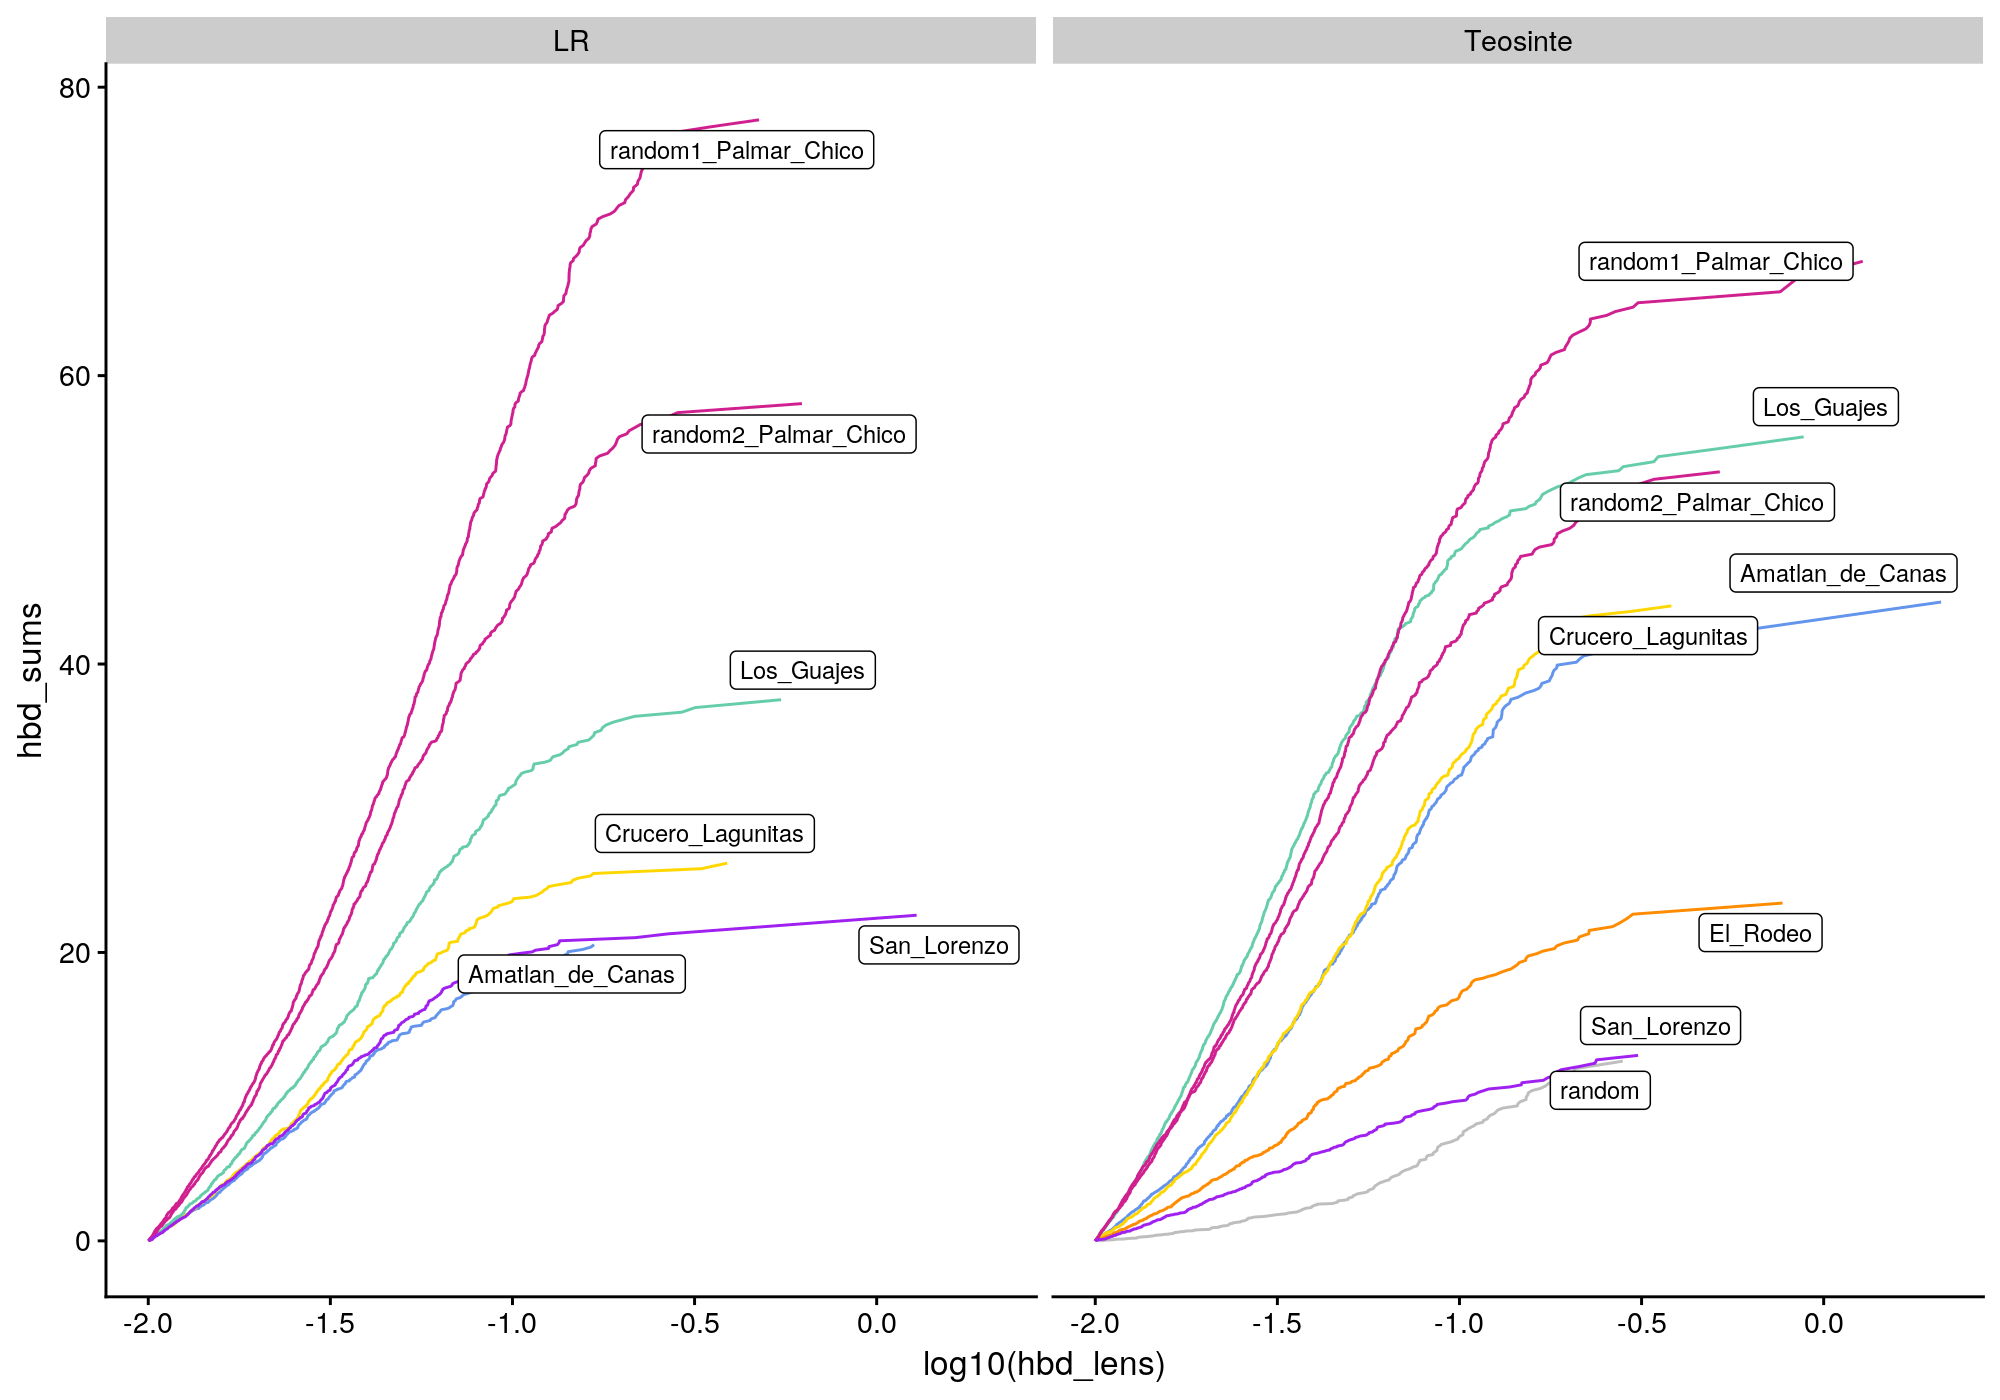

In [114]:
hbd_plot_df <- hbd_df %>% 
    filter(pop != "Palmar_Chico") %>% 
    #filter(LOD > 5) %>% 
    group_by(ssp_pop) %>% 
    filter(hbd_lens > 0.01) %>% 
    arrange(hbd_lens) %>% 
    mutate(hbd_sums = cumsum(hbd_lens)) %>% 
    ungroup() %>%     
    full_join(., mutate(color_df, pop = str_replace(pop, "LR_|Teo_", "")), by = "pop") %>% 
    drop_na() %>% 
    mutate(ssp = str_replace_all(ssp, "Teo", "Teosinte"))


hbd_plot_label <- 
    hbd_plot_df %>% 
    group_by(ssp_pop) %>% 
    filter(hbd_lens == max(hbd_lens, na.rm = TRUE)) %>% 
    ungroup() %>% 
    distinct()


hbd_plot_df %>% 
ggplot(aes(log10(hbd_lens), hbd_sums, group = ssp_pop, colour = color)) +
    geom_line() +
    ggrepel::geom_label_repel(data = hbd_plot_label, mapping = aes(x = log10(hbd_lens), y = hbd_sums, label = pop), color = "black", size = 3) +
    facet_wrap(~ssp) +
    theme(legend.position = "n") +
    scale_color_identity()


pop,color
<chr>,<chr>
LR_Los_Guajes,mediumaquamarine
Teo_Los_Guajes,mediumaquamarine
LR_Crucero_Lagunitas,gold
Teo_Crucero_Lagunitas,gold
LR_El_Rodeo,darkorange
Teo_El_Rodeo,darkorange
LR_Amatlan_de_Canas,cornflowerblue
Teo_Amatlan_de_Canas,cornflowerblue
LR_San_Lorenzo,purple


hbd_lens,hbd_sums,chr,ssp,pop,ssp_pop,mean_ind,sd_ind,min_ind,max_ind,LOD
<dbl>,<dbl>,<chr>,<chr>,<chr>,<glue>,<dbl>,<dbl>,<int>,<int>,<dbl>
4.504834e-03,0.004504834,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.78
1.131245e-02,0.015817281,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.21
2.126078e-02,0.037078059,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.72
9.552911e-03,0.046630969,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,5.04
7.331107e-03,0.053962076,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.66
5.512929e-03,0.059475005,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.91
1.228735e-03,0.060703741,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.00
1.965839e-03,0.062669580,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.07
7.944870e-03,0.070614450,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47,20.4722,6,77,3.42


In [ ]:
hist(log10(hbd_df$hbd_lens))

Warning message:
“Removed 7462 row(s) containing missing values (geom_path).”


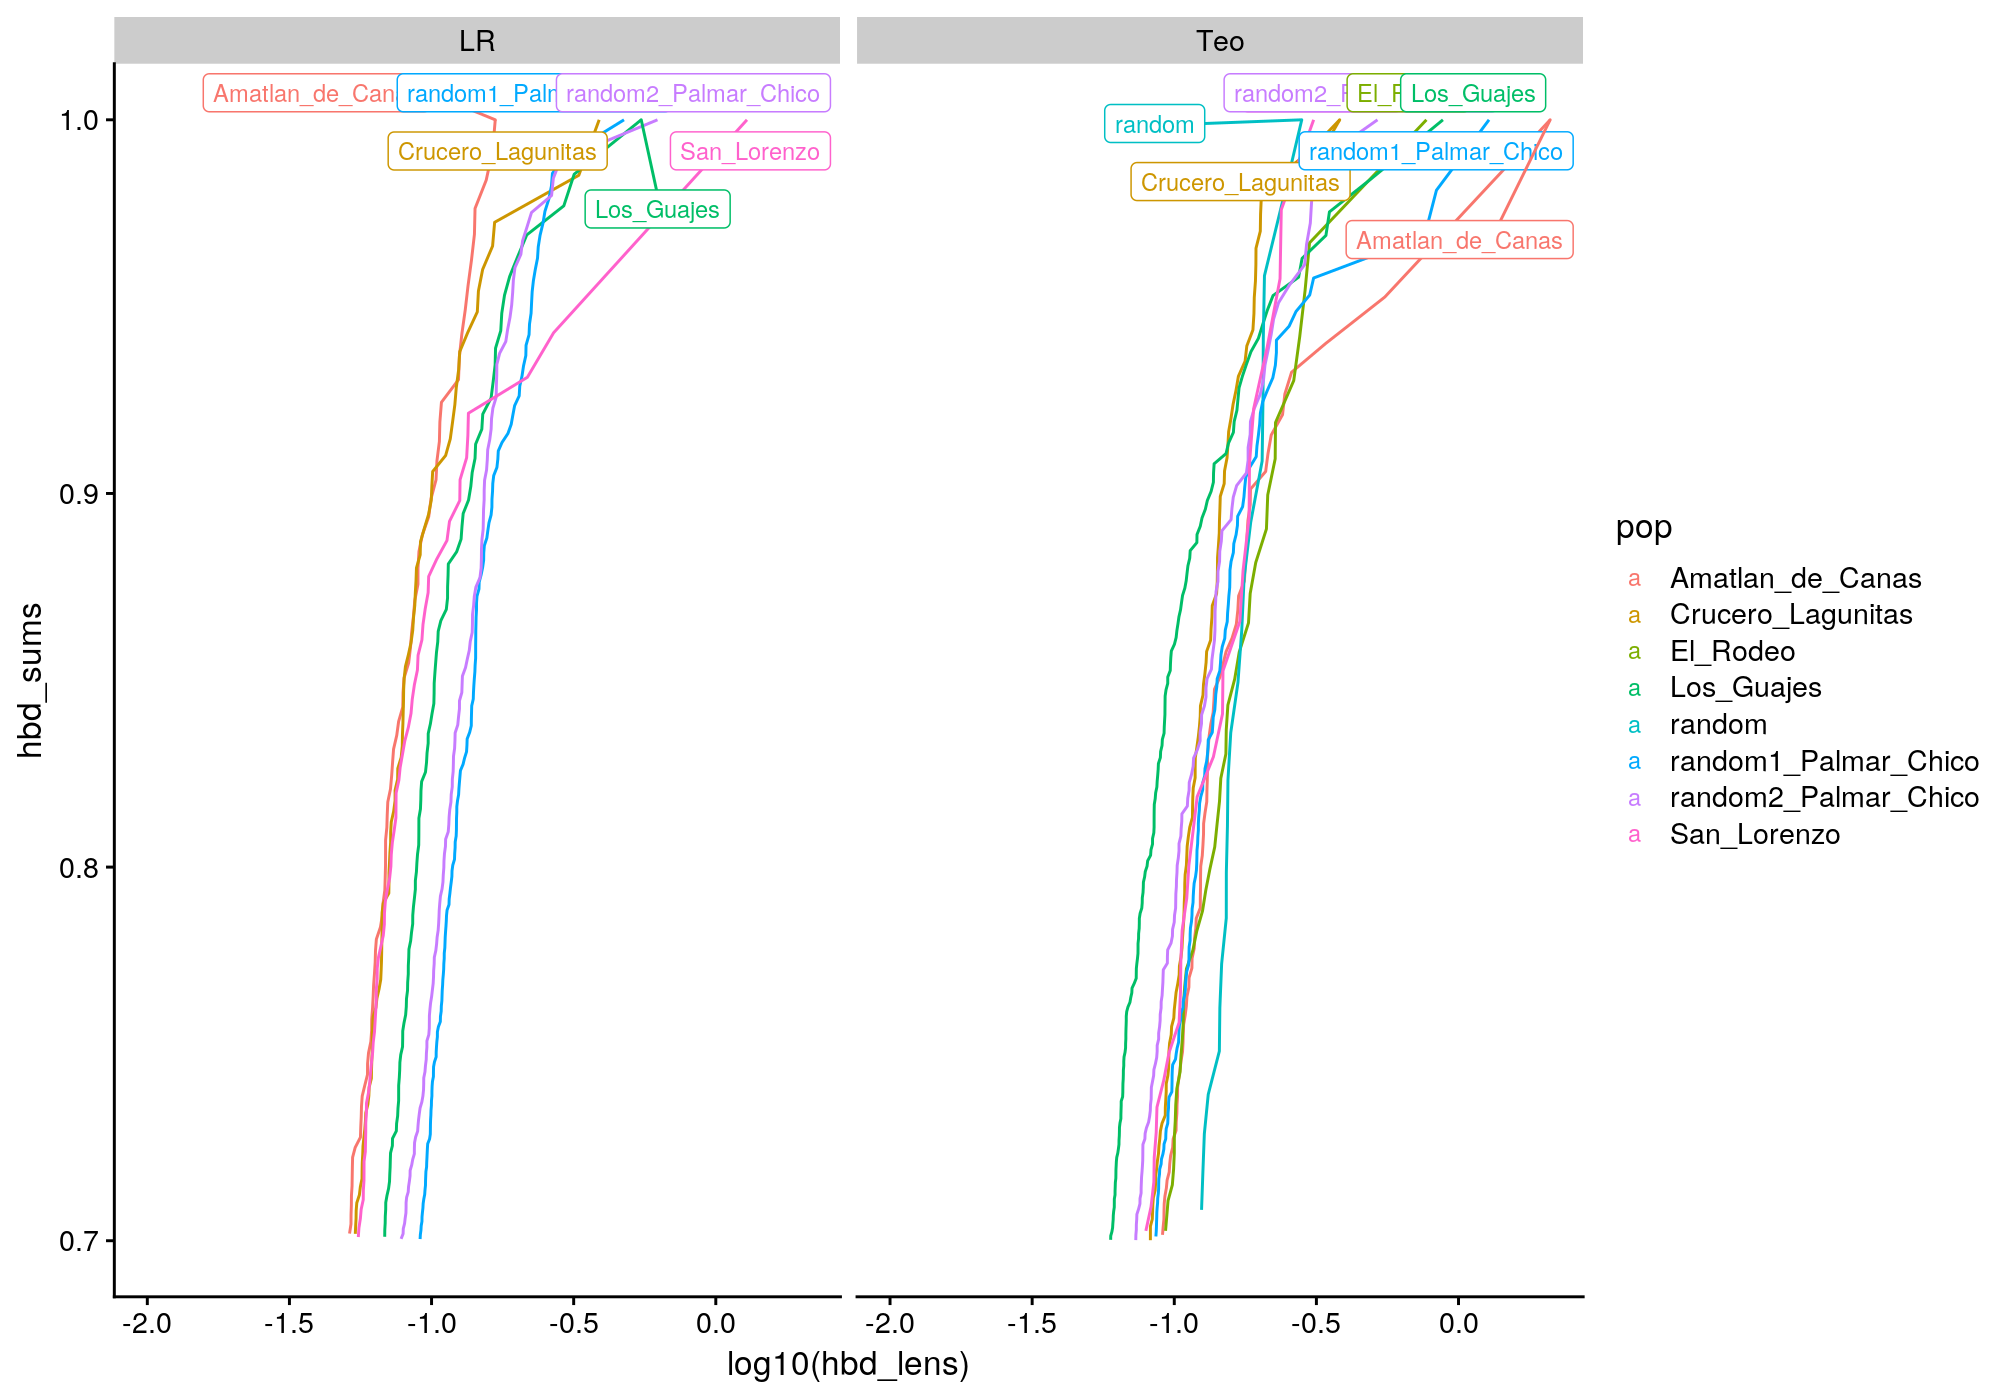

In [90]:
hbd_plot_df <- hbd_df %>% 
    filter(pop != "Palmar_Chico") %>% 
    group_by(ssp_pop) %>% 
    filter(hbd_lens > 0.01) %>% 
    arrange(hbd_lens) %>% 
    mutate(hbd_sums = cumsum(hbd_lens)/sum(hbd_lens)) %>%
    ungroup()

hbd_plot_label <- 
    hbd_plot_df %>% 
    group_by(ssp_pop) %>% 
    filter(hbd_lens == max(hbd_lens, na.rm = TRUE))%>% 
    ungroup()
    

hbd_plot_df %>% 
ggplot(aes(log10(hbd_lens), hbd_sums, colour = pop)) +
    geom_line() +
    ggrepel::geom_label_repel(data = hbd_plot_label, mapping = aes(x = log10(hbd_lens), y = hbd_sums, label = pop), size = 3) +
    facet_wrap(~ssp) +
    ylim(0.7, 1)


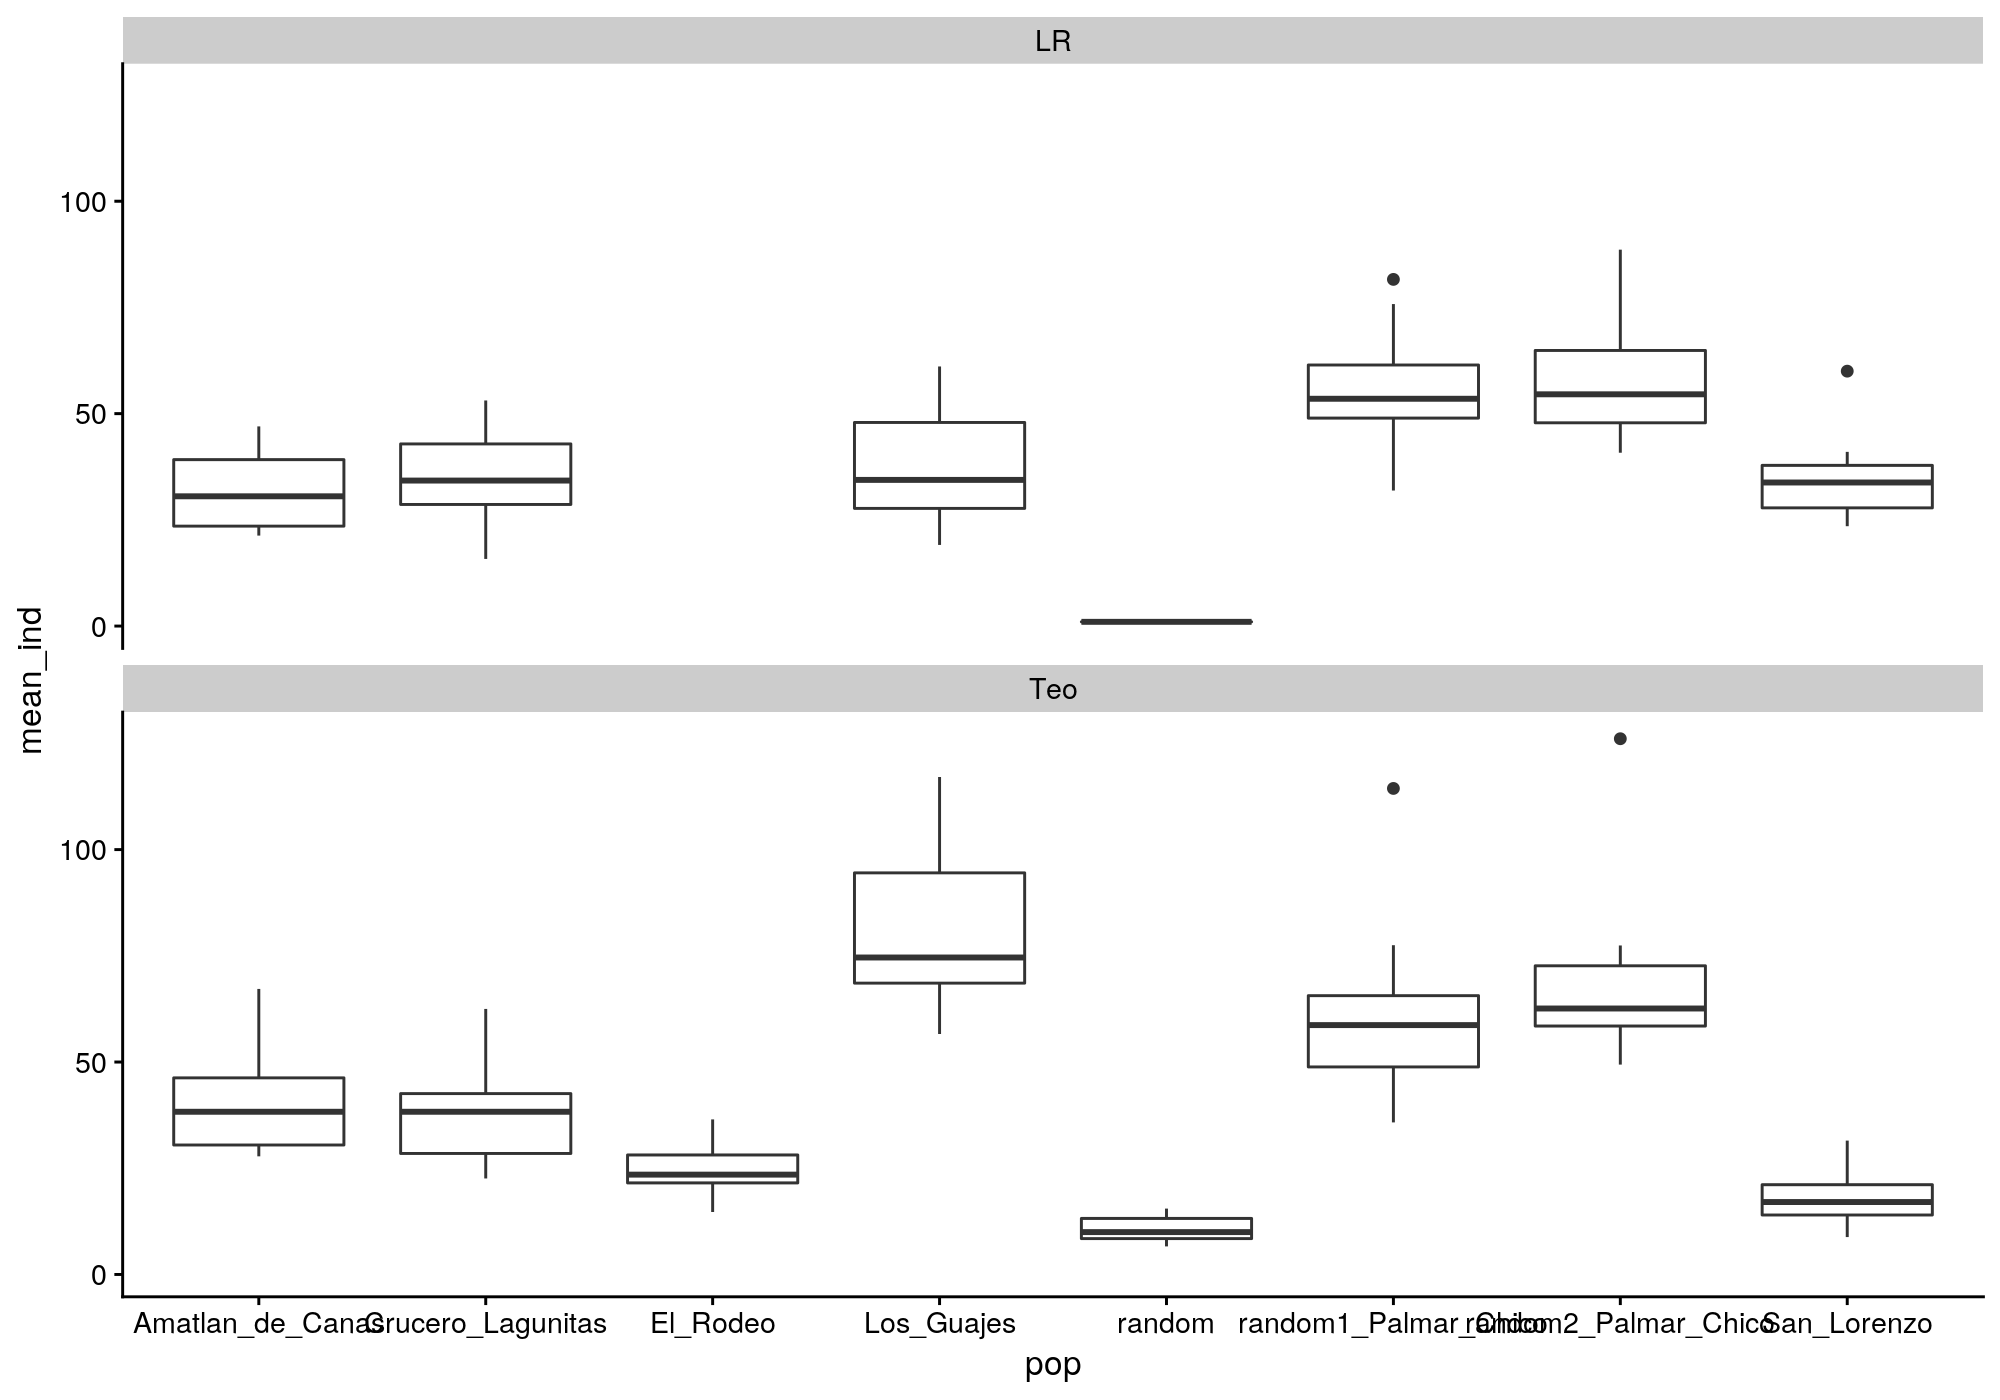

In [228]:
hbd_df %>% 
    filter(pop != "Palmar_Chico") %>% 
    select(-c(hbd_lens, hbd_sums)) %>% 
    distinct() %>% 
    group_by(ssp_pop) %>% 
    ggplot(aes(pop, mean_ind)) +
    geom_boxplot() +
    facet_wrap(~ssp, nrow = 2)

#hbd_df %>% select(ssp_pop, chr, ld_snps) %>% distinct() %>% filter(chr %in% c("chr1", "chr2"))

In [238]:
summary(hbd_df$LOD)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.310   3.780   4.207   4.620  46.220 